
### Analysis

# Pymaceuticals, Inc. - Squamous Cell Carcinoma (SCC) Study Summary

## Overview:
Pymaceuticals conducted a comprehensive animal study to assess potential treatments for squamous cell carcinoma (SCC), a prevalent form of skin cancer. The study involved 249 mice with SCC tumors, evaluating the efficacy of various drug regimens over a 45-day period. The primary objective was to compare the performance of Pymaceuticals' drug of interest, Capomulin, against other treatment regimens.

## Key Findings:

### 1. Treatment Regimens:
- Ten different drug regimens were administered to the mice, with a focus on evaluating the effectiveness of Capomulin.

### 2. Study Duration:
- The study spanned a 45-day period, during which tumor development was closely observed and measured.

### 3. Capomulin Effectiveness:
- Initial observations indicate promising results with Capomulin in controlling tumor development.

### 4. Mouse Weight vs. Tumor Volume:
- A positive correlation was noted between mouse weight and average tumor volume in the Capomulin regimen, suggesting a potential relationship.

### 5. Outliers and Statistical Analysis:
- Outliers were identified and addressed to ensure the reliability of statistical analyses.
- Key statistical measures, including correlation coefficients, were calculated to quantify relationships between variables.

## Recommendations:
It is recommended to conduct more in-depth analyses, including assessments of survival rates, time series analysis, and additional statistical tests. These analyses will provide a more comprehensive understanding of treatment outcomes and aid in informed decision-making for future drug development and clinical trials.

## Technical Report:
Detailed tables, figures, and statistical analyses, as requested by the executive team, have been prepared for inclusion in the technical report. These visualizations and summaries will offer a comprehensive overview of the study results.

## Conclusion:
The preliminary results showcase the potential efficacy of Capomulin in treating SCC. Further investigation, in collaboration with the medical team, is essential for drawing definitive conclusions and making informed decisions regarding the drug's development and its potential impact on combating squamous cell carcinoma.

 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice.
print('Number of unique mice IDs:', len(results_df['Mouse ID'].unique()))

Number of unique mice IDs: 249


In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = results_df[results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

duplicate_mouse_id



array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id

array(['g989'], dtype=object)

In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_results_df = results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

clean_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_results_df['Mouse ID'].nunique()

print(num_mice)

249


## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

summary_statistics

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])

summary_stats


,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.458254,50.854632,44.053659,6.637293
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

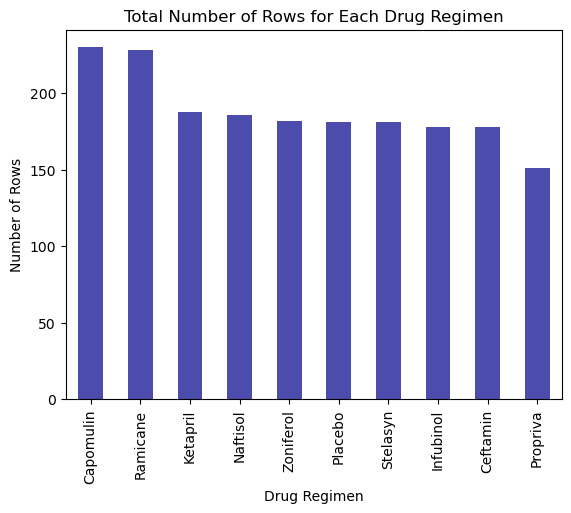

In [99]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_results_df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', color='darkblue', alpha=0.7)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()

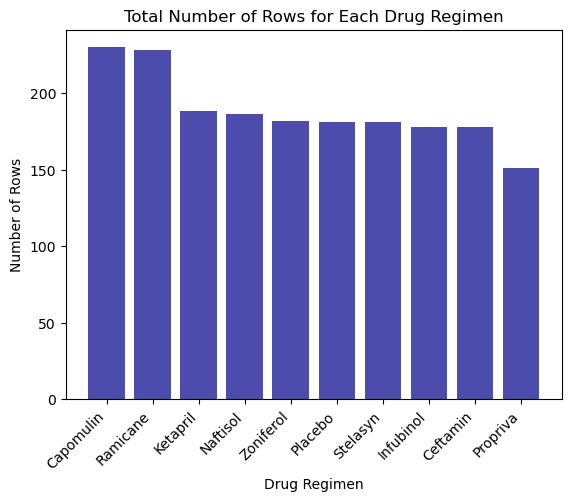

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_results_df['Drug Regimen'].value_counts()

drug_regimens = drug_regimen_counts.index
row_counts = drug_regimen_counts.values

plt.bar(drug_regimens, row_counts, color='darkblue', alpha=0.7)


plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

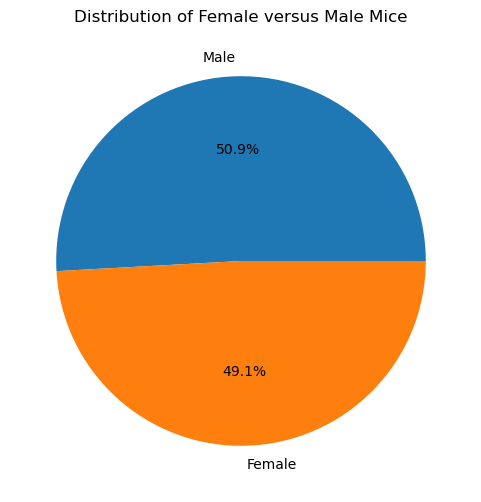

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
filtered_df =clean_results_df[(clean_results_df['Sex'] == 'Female') | (clean_results_df['Sex'] == 'Male')]
gender_counts = filtered_df['Sex'].value_counts()


plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')
plt.show()

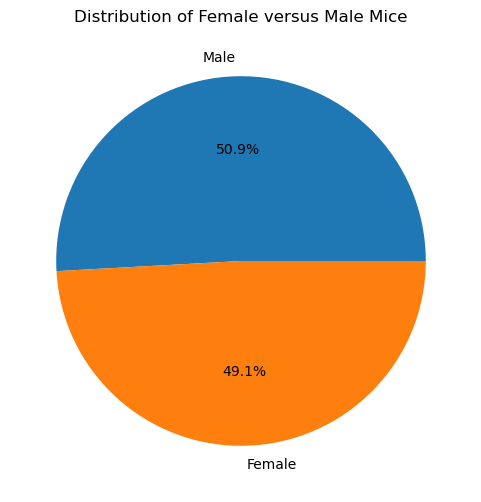

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

selected_regimen_df = clean_results_df[clean_results_df['Drug Regimen'].isin(selected_regimens)]

last_timepoints = selected_regimen_df.groupby('Mouse ID')['Timepoint'].max()

last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()

final_tumor_volume_df = pd.merge(last_timepoints_df, clean_results_df, on=['Mouse ID', 'Timepoint'], how='inner')

print("Final Tumor Volume for Each Mouse:")
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])


Final Tumor Volume for Each Mouse:
   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for regimen in selected_regimens:
    # Filter the final_tumor_volume_df for the current regimen
    regimen_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]
    
    tumor_volumes = regimen_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_volumes)
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = regimen_df[(regimen_df['Tumor Volume (mm3)'] < lower_bound) | (regimen_df['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"\nResults for {regimen}:")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers['Mouse ID'].tolist()}")

print("\nTumor Volume Data:")
for i, regimen in enumerate(selected_regimens):
    print(f"{regimen}: {tumor_vol_data[i].tolist()}")



Results for Capomulin:
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Results for Ramicane:
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Results for Infubinol:
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: ['c326']

Results for Ceftamin:
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []

Tumor Volume Data:
Capomulin: [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]
Ramicane: [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.128471

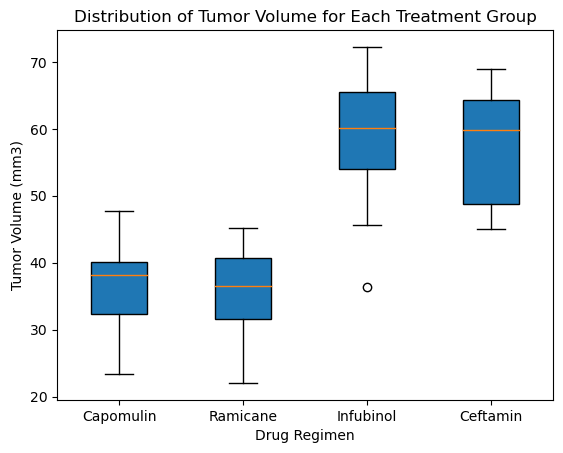

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_vol_data = [final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].tolist() for regimen in selected_regimens]

plt.boxplot(tumor_vol_data, labels=selected_regimens, patch_artist=True, vert=True)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

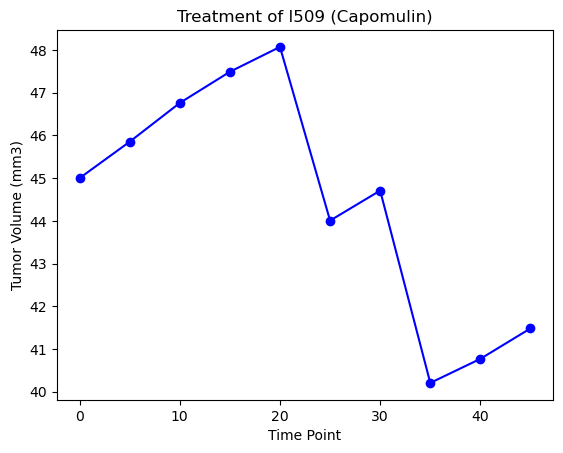

In [106]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'  

capomulin_mouse_df = clean_results_df[(clean_results_df['Drug Regimen'] == 'Capomulin') & (clean_results_df['Mouse ID'] == selected_mouse_id)]

plt.plot(capomulin_mouse_df['Timepoint'], capomulin_mouse_df['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

plt.title(f'Treatment of {selected_mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

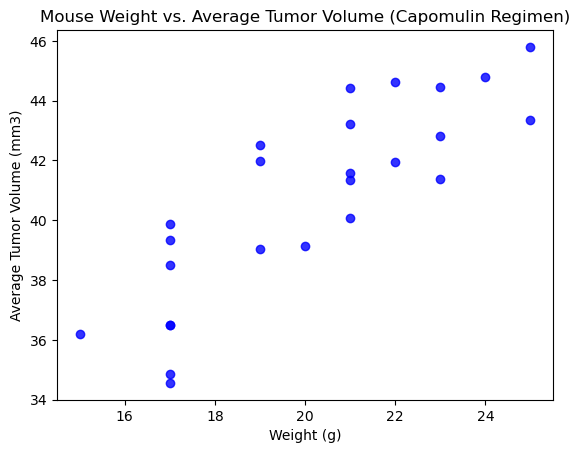

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_results_df[clean_results_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_avg_vol_df = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

plt.scatter(capomulin_avg_vol_df['Weight (g)'], capomulin_avg_vol_df['Tumor Volume (mm3)'], color='blue', alpha=0.8)

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


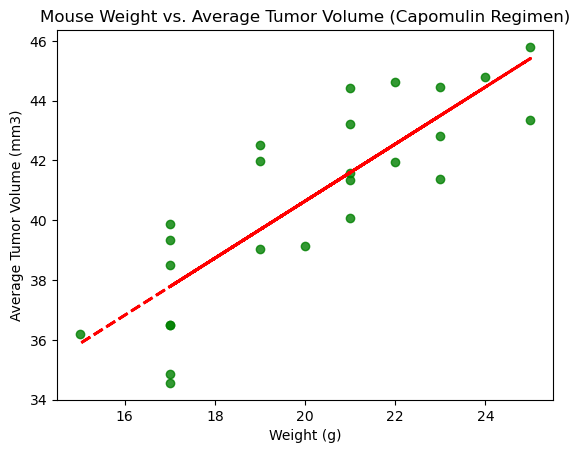

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_results_df[clean_results_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_avg_vol_df = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

correlation_coefficient = st.pearsonr(capomulin_avg_vol_df['Weight (g)'], capomulin_avg_vol_df['Tumor Volume (mm3)'])[0]

slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_vol_df['Weight (g)'], capomulin_avg_vol_df['Tumor Volume (mm3)'])

predicted_values = slope * capomulin_avg_vol_df['Weight (g)'] + intercept

plt.scatter(capomulin_avg_vol_df['Weight (g)'], capomulin_avg_vol_df['Tumor Volume (mm3)'], color='green', alpha=0.8)
plt.plot(capomulin_avg_vol_df['Weight (g)'], predicted_values, color='red', linestyle='--', linewidth=2)

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"Correlation Coefficient: {correlation_coefficient}")

plt.show()